In [1]:
import tskit
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tskit.__version__

'0.5.5'

In [4]:
ts = tskit.load("/nfs_home/users/osvk/projects/ukb_trees/tsinfer_testing/sample_load_testing/data/chr22/N20000/my.inferred.trees")
ts

In [5]:
sites_with_one_mut = np.where(np.bincount(ts.mutations_site, minlength=ts.num_sites)==1)[0]
sites_pos_with_one_mut = np.take(ts.sites_position, sites_with_one_mut)

In [6]:
#randomly select n query snps without replacement, from the list of sites with single mutation 
#for each snp, randomly select a snp <200kb away
#calculate r2 and note time taken
import time
ldcalc = tskit.LdCalculator(ts)
n = 500
max_dist = 200_000
query_sites = np.random.choice(sites_with_one_mut, size = n, replace=False)
r2 = []
compute_times = []
for a in np.sort(query_sites):
    a_pos = ts.sites_position[a]
    ld_range = np.where((sites_pos_with_one_mut >= a_pos - max_dist) & (sites_pos_with_one_mut <= a_pos + max_dist))[0]
    rand_ind = np.random.choice(ld_range)
    b = sites_with_one_mut[rand_ind]
    b_pos = sites_pos_with_one_mut[rand_ind]
    start_time = time.time()
    r2.append(ldcalc.r2(a, b))
    compute_times.append(time.time() - start_time)
    #print(f"LD between site {a} (position {a_pos} bp) and site {b} (position {b_pos} bp) located {abs(a_pos - b_pos)/1_000} kb apart is r2={r2}")
r2

[1.2500937554690433e-09,
 2.06425457381249e-08,
 6.250312511719142e-10,
 7.501312673458008e-09,
 3.750656350796428e-09,
 1.2500937554690433e-09,
 1.875187515235547e-09,
 1.250093755469043e-09,
 3.750656350796428e-09,
 1.875187515235547e-09,
 3.750468794535059e-09,
 8.751969116471478e-09,
 7.501500243787505e-09,
 6.250312511719142e-10,
 1.8955611299285228e-07,
 2.5003125328158207e-09,
 6.250312511719142e-10,
 3.1254688105544937e-09,
 3.3592241314739123e-06,
 1.5635162611397996e-08,
 1.875187515235547e-09,
 1.7609089338772753e-06,
 4.445501705801305e-08,
 3.324972294668355e-07,
 2.2007921980913915e-05,
 8.751969116471478e-09,
 6.250312511719142e-10,
 6.250312511719142e-10,
 2.2527591230549393e-07,
 3.252276487842504e-08,
 3.750468794535059e-09,
 3.385207040722159e-05,
 5.0011252281707125e-09,
 6.250312511719142e-10,
 1.875187515235547e-09,
 1.875187515235547e-09,
 7.502438236158462e-09,
 9.376875287149227e-09,
 8.845885422031641e-07,
 7.501500243787505e-09,
 1.5635162611397996e-08,
 6.25

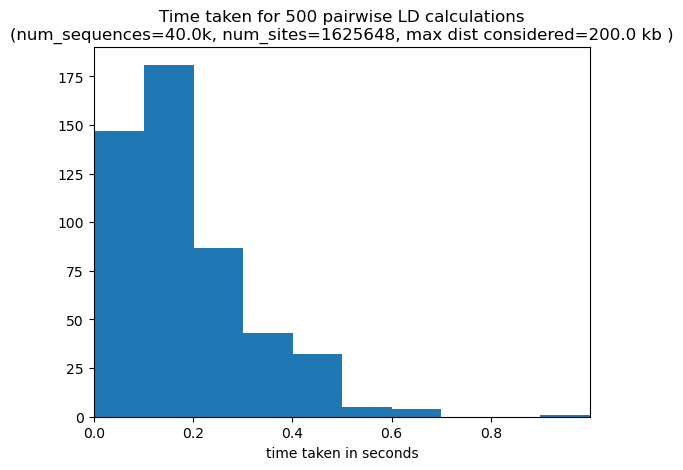

In [9]:
plt.hist(compute_times)
plt.title(f"Time taken for {n} pairwise LD calculations\n(num_sequences={ts.num_samples/1_000}k, num_sites={len(sites_with_one_mut)}, max dist considered={max_dist/1_000} kb )")
plt.xlabel("time taken in seconds")
plt.xlim(0,max(compute_times))
plt.show()